<a href="https://colab.research.google.com/github/tyuyamato/ML_training/blob/main/%E6%B1%BA%E5%AE%9A%E6%9C%A8%E3%81%AE%E7%B7%B4%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

練習
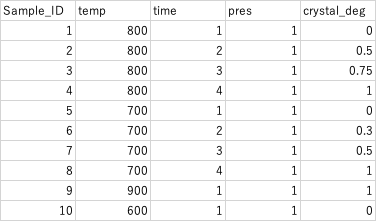

PCA

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA  # scikit-learn の中の PCA を実行するためのライブラリのインポート


In [ ]:
dataset = pd.read_csv('phase_est.csv', index_col=0)
autoscaled_dataset = (dataset - dataset.mean()) / dataset.std()

In [ ]:
autoscaled_dataset

,temp,time,pres,crystal_deg
Sample_ID,,,,
1,0.588348,-0.976187,NaN,-1.196871
2,0.588348,-0.162698,NaN,-0.011850
3,0.588348,0.650791,NaN,0.580660
4,0.588348,1.464281,NaN,1.173171
5,-0.588348,-0.976187,NaN,-1.196871
6,-0.588348,-0.162698,NaN,-0.485859
7,-0.588348,0.650791,NaN,-0.011850
8,-0.588348,1.464281,NaN,1.173171
9,1.765045,-0.976187,NaN,1.173171


In [ ]:
autoscaled_dataset = autoscaled_dataset.drop("pres",axis=1)

In [ ]:
display(autoscaled_dataset)

,temp,time,crystal_deg
Sample_ID,,,
1,0.588348,-0.976187,-1.196871
2,0.588348,-0.162698,-0.011850
3,0.588348,0.650791,0.580660
4,0.588348,1.464281,1.173171
5,-0.588348,-0.976187,-1.196871
6,-0.588348,-0.162698,-0.485859
7,-0.588348,0.650791,-0.011850
8,-0.588348,1.464281,1.173171
9,1.765045,-0.976187,1.173171


In [ ]:
# PCA
pca = PCA()  # PCA を行ったり PCA の結果を格納したりするための変数を、pca として宣言
pca.fit(autoscaled_dataset)  # PCA を実行

PCA()

In [ ]:
loadings = pd.DataFrame(pca.components_.T)  # ローディングを pandas の DataFrame 型に変換
loadings.index = autoscaled_dataset.columns
display(loadings)

,0,1,2
temp,-0.431443,7.922844e-01,-0.431443
time,-0.560230,-6.101519e-01,-0.560230
crystal_deg,-0.707107,-1.110223e-16,0.707107


In [ ]:
score = pd.DataFrame(pca.transform(autoscaled_dataset))  # 主成分スコアの計算した後、pandas の DataFrame 型に変換
score.index = dataset.index  # 主成分スコアのサンプル名を、元のデータセットのサンプル名に
display(score)

,0,1,2
Sample_ID,,,
1,1.139366,1.061762,-0.553265
2,-0.154311,0.565410,-0.171070
3,-1.029020,0.069058,-0.207842
4,-1.903729,-0.427294,-0.244615
5,1.647043,0.129483,-0.045588
6,0.688541,-0.366869,0.001433
7,-0.102375,-0.863221,-0.119133
8,-1.396052,-1.359573,0.263062
9,-1.044184,1.994040,0.614931


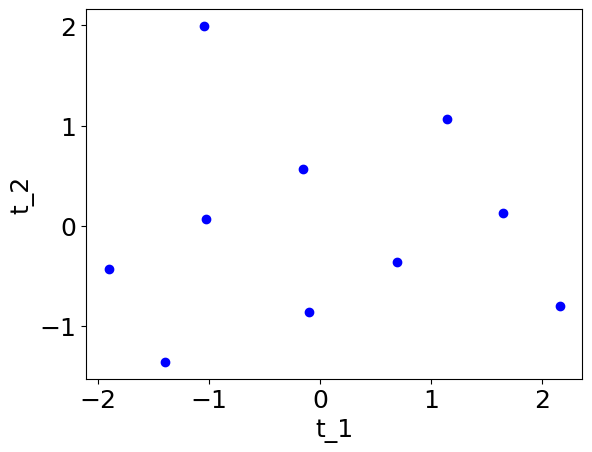

In [ ]:
# 第 1 主成分と第 2 主成分の散布図
plt.rcParams['font.size'] = 18
plt.scatter(score.iloc[:, 0], score.iloc[:, 1], c='blue')
plt.xlabel('t_1')
plt.ylabel('t_2')
plt.show()

In [ ]:
contribution_ratios = pd.DataFrame(pca.explained_variance_ratio_)  # 寄与率を DataFrame 型に変換
cumulative_contribution_ratios = contribution_ratios.cumsum()  # cumsum() で寄与率の累積和を計算
cont_cumcont_ratios = pd.concat(
    [contribution_ratios, cumulative_contribution_ratios],
    axis=1).T
cont_cumcont_ratios.index = ['contribution_ratio', 'cumulative_contribution_ratio']  # 行の名前を変更
display(cont_cumcont_ratios)

,0,1,2
contribution_ratio,0.62535,0.333333,0.041316
cumulative_contribution_ratio,0.62535,0.958684,1.000000


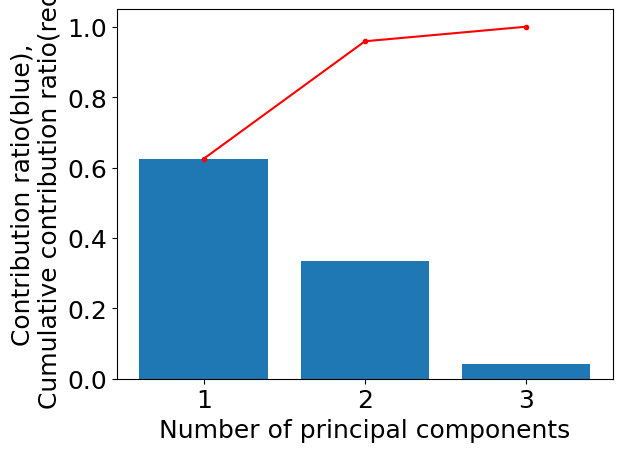

In [ ]:
# 寄与率を棒グラフで、累積寄与率を線で入れたプロット図を重ねて描画
x_axis = range(1, contribution_ratios.shape[0] + 1)  # 1 から成分数までの整数が x 軸の値
plt.rcParams['font.size'] = 18
plt.bar(x_axis, contribution_ratios.iloc[:, 0], align='center')  # 寄与率の棒グラフ
plt.plot(x_axis, cumulative_contribution_ratios.iloc[:, 0], 'r.-')  # 累積寄与率の線を入れたプロット図
plt.xlabel('Number of principal components')  # 横軸の名前
plt.ylabel('Contribution ratio(blue),\nCumulative contribution ratio(red)')  # 縦軸の名前。\n で改行しています
plt.show()


階層的クラスタリング

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster  # SciPy の中の階層的クラスタリングを実行したり樹形図を作成したりするためのライブラリをインポート
from sklearn.decomposition import PCA

In [ ]:
number_of_clusters = 3  # クラスターの数

In [ ]:
dataset = pd.read_csv('phase_est.csv', index_col=0)
x = dataset
autoscaled_x = (x - x.mean()) / x.std()  # オートスケーリング

In [ ]:
display(autoscaled_x)

,temp,time,pres,crystal_deg
Sample_ID,,,,
1,0.588348,-0.976187,NaN,-1.196871
2,0.588348,-0.162698,NaN,-0.011850
3,0.588348,0.650791,NaN,0.580660
4,0.588348,1.464281,NaN,1.173171
5,-0.588348,-0.976187,NaN,-1.196871
6,-0.588348,-0.162698,NaN,-0.485859
7,-0.588348,0.650791,NaN,-0.011850
8,-0.588348,1.464281,NaN,1.173171
9,1.765045,-0.976187,NaN,1.173171


In [ ]:
autoscaled_x = autoscaled_x.drop("pres",axis=1)

In [ ]:
# 階層的クラスタリング
clustering_results = linkage(autoscaled_x, metric='euclidean', method='ward')
# 　metric, method を下のように変えることで、それぞれ色々な距離、手法で階層的クラスタリングを実行可能
#
# metric の種類
# - euclidean : ユークリッド距離
# - cityblock : マンハッタン距離(シティブロック距離)
# など
#
# method の種類
# - single : 最近隣法
# - complete : 最遠隣法
# - weighted : 重心法
# - average : 平均距離法
# - ward : ウォード法
# など

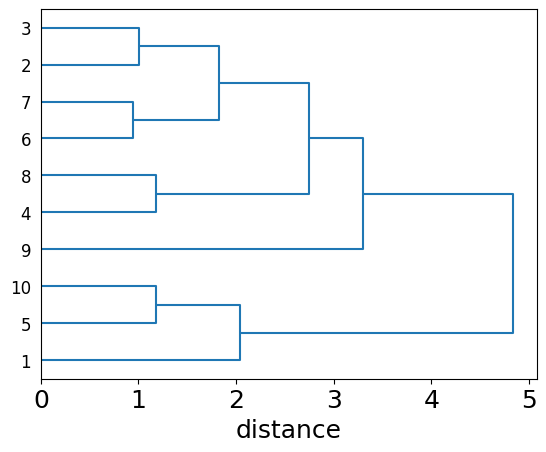

In [ ]:
plt.rcParams['font.size'] = 18  # 横軸や縦軸の名前の文字などのフォントのサイズ
dendrogram(clustering_results, labels=list(x.index), color_threshold=0,
           orientation='right')  # デンドログラムの作成。labels=x.index でサンプル名を入れています
plt.xlabel('distance')  # 横軸の名前
plt.show()

In [ ]:
cluster_numbers = fcluster(clustering_results, number_of_clusters, criterion='maxclust')  # クラスターの数で分割し、クラスター番号を出力
cluster_numbers = pd.DataFrame(cluster_numbers, index=x.index,
                               columns=['cluster_numbers'])  # DataFrame 型に変換。行の名前・列の名前も設定
display(cluster_numbers)

,cluster_numbers
Sample_ID,
1,1
2,2
3,2
4,2
5,1
6,2
7,2
8,2
9,3


In [ ]:
dataset = pd.read_csv('phase_est.csv')
labels = dataset.iloc[:,0].tolist()

In [ ]:
display(labels)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

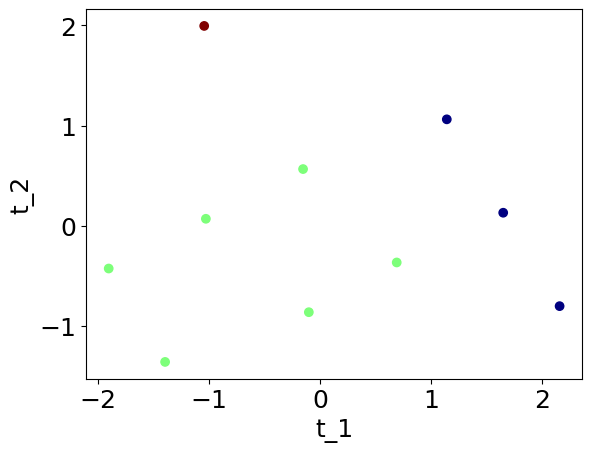

In [ ]:
# 主成分分析 (Principal Component Analysis, PCA) によるクラスタリング結果の可視化
pca = PCA()
pca.fit(autoscaled_x)
# スコア
score = pd.DataFrame(pca.transform(autoscaled_x), index=x.index)
# 第 1 主成分と第 2 主成分の散布図
plt.rcParams['font.size'] = 18
plt.scatter(score.iloc[:, 0], score.iloc[:, 1], c=cluster_numbers.iloc[:, 0],
            cmap=plt.get_cmap('jet'))  # 散布図の作成。クラスター番号ごとにプロットの色を変えています
plt.xlabel('t_1')
plt.ylabel('t_2')


plt.show()

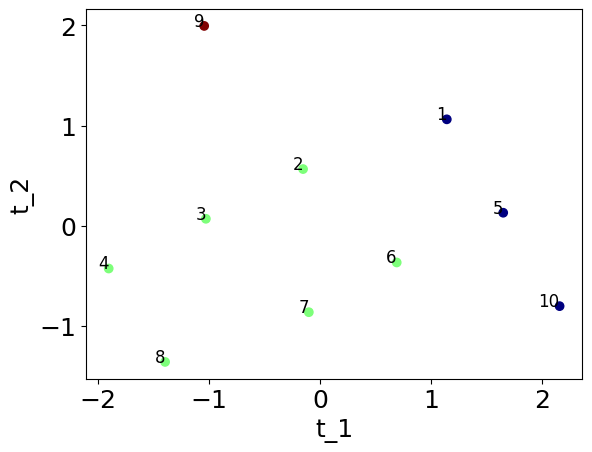

In [ ]:
# ポイントにラベルを追加
for i, txt in enumerate(score.index):
    plt.annotate(txt, (score.iloc[i, 0], score.iloc[i, 1]), fontsize=12, ha='right')

# 散布図の作成。クラスター番号ごとにプロットの色を変えています
plt.scatter(score.iloc[:, 0], score.iloc[:, 1], c=cluster_numbers.iloc[:, 0], cmap=plt.get_cmap('jet'))

# 軸ラベルの追加
plt.xlabel('t_1')
plt.ylabel('t_2')

# グラフの表示
plt.show()

単回帰

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/phase_est.csv")

In [ ]:
train_data = df.drop(["pres","Sample_ID","crystal_deg"], axis=1) #axis=0は列、axis=1は行、デフォルトは0
Y = df["crystal_deg"]

X = train_data

In [ ]:
display(Y)

0    0.00
1    0.50
2    0.75
3    1.00
4    0.00
5    0.30
6    0.50
7    1.00
8    1.00
9    0.00
Name: crystal_deg, dtype: float64

In [ ]:
display(X)

,temp,time
0,800,1
1,800,2
2,800,3
3,800,4
4,700,1
5,700,2
6,700,3
7,700,4
8,900,1
9,600,1


In [ ]:
print(X["temp"])

0    800
1    800
2    800
3    800
4    700
5    700
6    700
7    700
8    900
9    600
Name: temp, dtype: int64


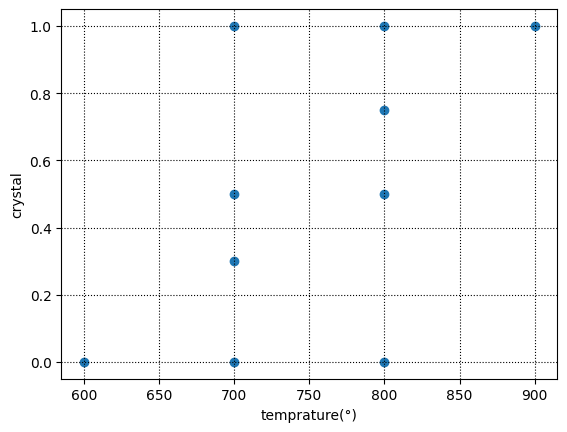

In [ ]:
x = X["temp"]
y = Y

plt.scatter(x,y)
plt.xlabel("temprature(°)")
plt.ylabel("crystal")
plt.grid(which='major',color='black',linestyle=':')


In [ ]:
x = x
y = Y.values
X = x.reshape(-1,1)

In [ ]:
regr = LinearRegression(fit_intercept = True)
regr.fit(X,y)

LinearRegression()

In [ ]:
a = regr.coef_ #傾きを求める
b = regr.intercept_#切片を求める
print(a)
print(b)

[0.00265385]
-1.4853846153846146


In [ ]:
regr.score(X,Y)

0.2857160003360659

In [ ]:
regr = LinearRegression(fit_intercept = True)
regr.fit(X,Y)

LinearRegression()

In [ ]:
a = regr.coef_ #傾きを求める
b = regr.intercept_#切片を求める
print(a)
print(b)

[0.00265385]
-1.4853846153846146


Text(0, 0.5, 'sales')

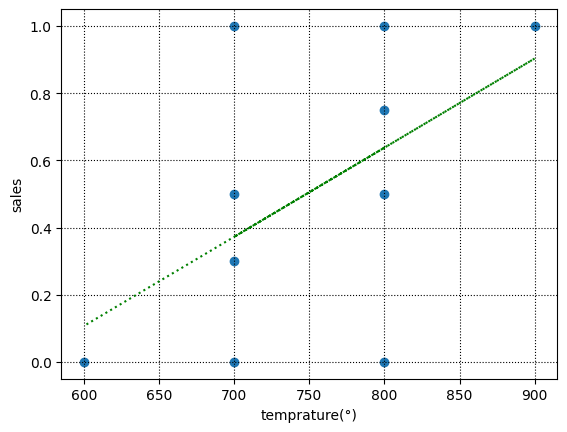

In [ ]:
#直線の式
y_est_sklearn = regr.intercept_ + regr.coef_[0] * x
#本来の気温と売上のプロット
plt.scatter(x, y, marker='o')
#本来の気温と、予測の直線の式
plt.plot(x, y_est_sklearn, linestyle=':', color='green')
#図の細かい設定
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.xlabel("temprature(°)")
plt.ylabel("sales")

重回帰

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/phase_est.csv")

In [ ]:
train_data = df.drop(["pres","Sample_ID","crystal_deg"], axis=1) #axis=0は列、axis=1は行、デフォルトは0
Y = df["crystal_deg"]

X = train_data

In [ ]:
regr = LinearRegression(fit_intercept = True)
regr.fit(X,Y)

LinearRegression()

In [ ]:
b = regr.intercept_
a1 = regr.coef_[0]
a2 = regr.coef_[1]


pd.DataFrame([b,a1,a2],index = ["b","a1","a2"])


,0
b,-2.009502
a1,0.002654
a2,0.238235


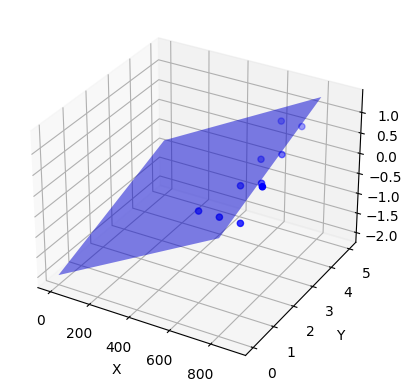

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_plane(a, b, c, d):
    # Create a meshgrid for x, y values
    x = np.linspace(0, 800, 100) #(今後の課題、ここの取得の自動化。点の最大値最小値を取得して範囲にしたらいい)
    y = np.linspace(0, 5, 100)
    x, y = np.meshgrid(x, y)

    # Calculate z values based on the plane equation
    z = (-a * x - b * y - d) / c

    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot the plane
    ax.plot_surface(x, y, z, alpha=0.5, rstride=100, cstride=100, color='b')

    # Set labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    # Show the plot
    return ax

# 例として、平面の方程式 2x + 3y - z + 1 = 0 を描く
ax = plot_plane(a1, a2, -1,b )

x = X["temp"]
y = X["time"]
z =Y
#ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z, color='blue')


plt.show()



In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
z = pd.DataFrame([[500,15],
                  [1500,6],
                  [700,8],
                  [100,1]])

In [ ]:
regr.predict(z)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 2.89095023,  3.40067873,  1.7540724 , -1.50588235])

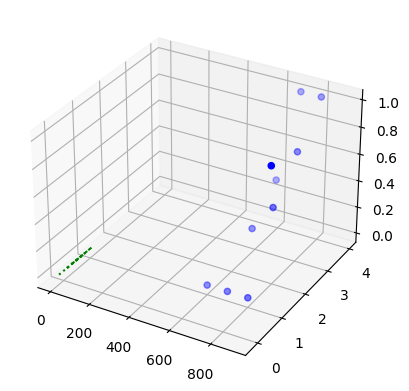

In [ ]:
x = X["temp"]
y = X["time"]
z =Y
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x, y, z, color='blue')




plt.show()

後日質問
もっといい感じに線を引きたい

ランダムフォレスト回帰

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split#データ分割用
from sklearn.ensemble import RandomForestClassifier#ランダムフォレスト分類
from sklearn.ensemble import RandomForestRegressor#ランダムフォレスト回帰

In [ ]:
df = pd.read_csv("/content/phase_est.csv")


In [ ]:
df.head()

,Sample_ID,temp,time,pres,crystal_deg
0,1,800,1,1,0.00
1,2,800,2,1,0.50
2,3,800,3,1,0.75
3,4,800,4,1,1.00
4,5,700,1,1,0.00


In [ ]:
train_data = df.drop(["pres","Sample_ID","crystal_deg"], axis=1) #axis=0は列、axis=1は行、デフォルトは0
y = df["crystal_deg"]#.values

X = train_data#.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)


In [ ]:
display(train_data)

,temp,time
0,800,1
1,800,2
2,800,3
3,800,4
4,700,1
5,700,2
6,700,3
7,700,4
8,900,1
9,600,1


In [ ]:
print(y)

0    0.00
1    0.50
2    0.75
3    1.00
4    0.00
5    0.30
6    0.50
7    1.00
8    1.00
9    0.00
Name: crystal_deg, dtype: float64


In [ ]:
clr = RandomForestRegressor(random_state=1234)
clr.fit(X_train, y_train)
print("score=", clr.score(X_test, y_test))

score= 0.7461704615384616


In [ ]:
z = pd.DataFrame([[500,15],
                  [1500,6],
                  [700,8],
                  [100,1]])

In [ ]:
clr.predict(z)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([0.709, 0.955, 0.709, 0.063])

https://qiita.com/Hawaii/items/53efe3e96b1171ebc7db

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#下記は決定木可視化のためのツール
import graphviz
import pydotplus
from IPython.display import Image
from six import StringIO

In [ ]:
data = pd.DataFrame({
        "buy(y)":[True,True,True,True,True,True,True,False,False,False,False,False,False],
        "high":[4, 5, 3, 1, 6, 3, 4, 1, 2, 1, 1,1,3],
        "size":[30, 45, 32, 20, 35, 40, 38, 20, 18, 20, 22,24,25],
        "autolock":[1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,1,0]
    })

In [ ]:
y = data.loc[:,["buy(y)"]]
X = data.loc[:,["high", "size","autolock"]]

In [ ]:
clf = DecisionTreeClassifier()
clf = clf.fit(X, y)
print(clf.classes_)

[False  True]


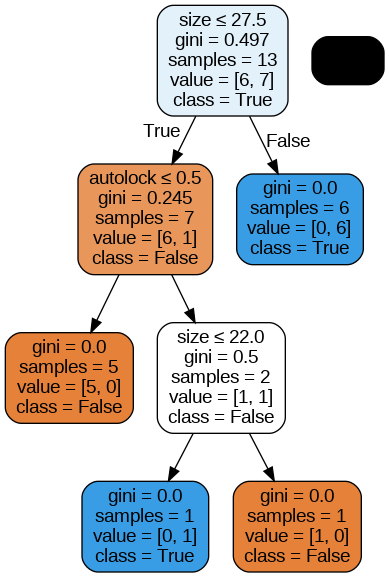

In [ ]:
dot_data = StringIO() #dotファイル情報の格納先
export_graphviz(clf, out_file=dot_data,
                     feature_names=["high", "size","autolock"],#編集するのはここ
                     class_names=["False","True"],#編集するのはここ（なぜFase,Trueの順番なのかは後程触れます）
                     filled=True, rounded=True,
                     special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
z = pd.DataFrame({
        "high":[2, 3],
        "size":[25, 18],
        "autolock":[1,0]
    })
z2 = z[["high", "size","autolock"]].values

In [ ]:
y_est = clf.predict(z2)
y_est

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([False, False])

https://qiita.com/Hawaii/items/5831e667723b66b46fba

In [ ]:
import pandas as pd#pandasのインポート
import datetime#元データの日付処理のためにインポート
from sklearn.model_selection import train_test_split#データ分割用
from sklearn.ensemble import RandomForestClassifier#ランダムフォレスト

In [ ]:

df = pd.read_csv("/content/ks-projects-201801.csv")


In [ ]:
df.shape

(378661, 15)

In [ ]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [ ]:
df['deadline'] = pd.to_datetime(df["deadline"])
df["launched"] = pd.to_datetime(df["launched"])
df["days"] = (df["deadline"] - df["launched"]).dt.days


In [ ]:
df = df[(df["state"] == "successful") | (df["state"] == "failed")]


In [ ]:
df["state"] = df["state"].replace("failed",0)
df["state"] = df["state"].replace("successful",1)


In [ ]:
df = df.drop(["ID","name","deadline","launched","backers","pledged","usd pledged","usd_pledged_real","usd_goal_real"], axis=1)


In [ ]:
df = pd.get_dummies(df,drop_first = True)


In [ ]:
train_data = df.drop("state", axis=1)
y = df["state"].values
X = train_data.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)


In [ ]:
clf = RandomForestClassifier(random_state=1234)
clf.fit(X_train, y_train)
print("score=", clf.score(X_test, y_test))


score= 0.6488749082942222


https://qiita.com/Hawaii/items/150897d4f807e5597f18

In [ ]:
from sklearn.linear_model import LinearRegression


In [ ]:
data = pd.DataFrame({
    "temprature(=x)":[8,10,6,15,12,16,20,13,24,26,12,18,19,16,20,23,26,28],
    "sales(=y)":[30,35,28,38,35,40,60,34,63,65,38,40,41,43,42,55,65,69]
    })


In [ ]:
import matplotlib.pyplot as plt


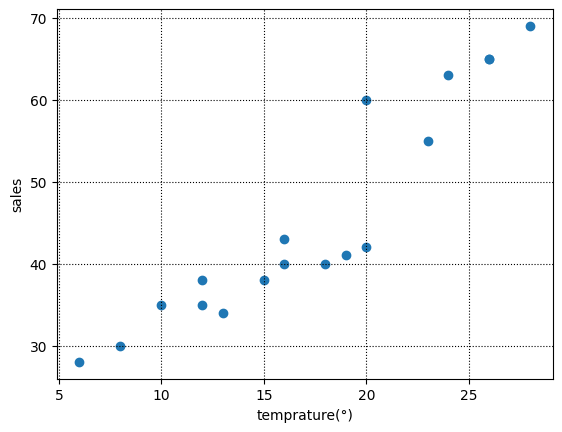

In [ ]:
plt.scatter(data["temprature(=x)"],data["sales(=y)"])
plt.xlabel("temprature(°)")
plt.ylabel("sales")
plt.grid(which='major',color='black',linestyle=':')


In [ ]:
x = data["temprature(=x)"].values
y = data["sales(=y)"].values
X = x.reshape(-1,1)


In [ ]:
regr = LinearRegression(fit_intercept = True)
regr.fit(X,y)


LinearRegression()

In [ ]:
a = regr.coef_ #傾きを求める
b = regr.intercept_#切片を求める
print(a)
print(b)


[1.92602996]
12.226591760299634


In [ ]:
regr.get_params()


{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
regr.score(X,y)


0.8716128626914588

Text(0, 0.5, 'sales')

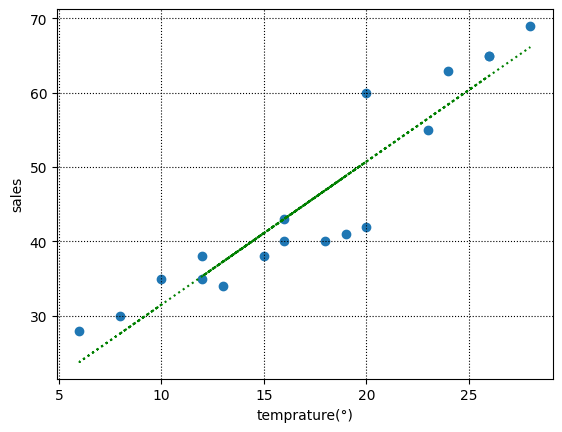

In [ ]:
#直線の式
y_est_sklearn = regr.intercept_ + regr.coef_[0] * x
#本来の気温と売上のプロット
plt.scatter(x, y, marker='o')
#本来の気温と、予測の直線の式
plt.plot(x, y_est_sklearn, linestyle=':', color='green')
#図の細かい設定
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.xlabel("temprature(°)")
plt.ylabel("sales")


In [ ]:
z = pd.DataFrame([10,25,24,22])


In [ ]:
regr.predict(z)


array([31.48689139, 60.37734082, 58.45131086, 54.59925094])

https://qiita.com/Hawaii/items/b84a0d669bcf5267e750

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


In [ ]:
data = pd.DataFrame({
    "temprature":[8,10,6,15,12,16,20,13,24,26,12,18,19,16,20,23,26,28],
    "car":[100,20,30,15,60,25,40,20,18,30,60,10,8,25,35,90,25,55],
    "clerk":[3,5,4,6,6,7,12,8,12,10,7,7,8,6,6,10,12,13],
    "sales(=y)":[30,35,28,38,35,40,60,34,63,65,38,40,41,43,42,55,65,69]
    })


In [ ]:
y = data["sales(=y)"].values
X = data.drop("sales(=y)", axis=1).values  #sales以外の列をXとして定義する、という意味


In [ ]:
regr = LinearRegression(fit_intercept = True)
regr.fit(X,y)


LinearRegression()

In [ ]:
b = regr.intercept_
a1 = regr.coef_[0]
a2 = regr.coef_[1]
a3 = regr.coef_[2]

pd.DataFrame([b,a1,a2,a3],index = ["b","a1","a2","a3"])


,0
b,8.131467
a1,1.074159
a2,0.046940
a3,2.170663


In [ ]:
z = pd.DataFrame([[20,15,18],
                  [15,60,30],
                  [5,8,12]])


In [ ]:
regr.predict(z)


array([69.39068087, 92.18012508, 39.92573722])